<Axes: >

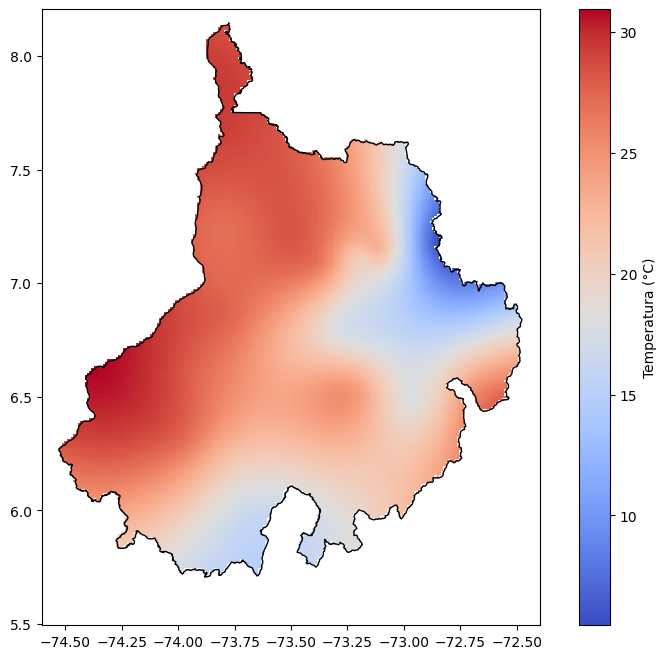

In [1]:
import verde as vd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

region = ((-74.6), (-72.4), (5.5), (8.2)) 
spacing = 0.01  
grid = vd.grid_coordinates(region, spacing=spacing)
grid_temperatura = np.load("../data/tmean_interp_final/npy/temperatura_2000-01-01.npy")
data = pd.read_excel('../data/tmean.xlsx')
gdf = gpd.read_file('../data/aoi/Departamento.shp')
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")
santander_gdf = gdf[gdf['DeNombre'] == 'Santander'] 
mask = np.load("../data/mask.npy")

plt.figure(figsize=(10, 8))
plt.pcolormesh(grid[0], grid[1], grid_temperatura * mask, cmap='coolwarm', shading='auto')
plt.colorbar(label='Temperatura (°C)')
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")

In [ ]:
import verde as vd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.features import geometry_mask
import rasterio


region = (-74.6, -72.4, 5.5, 8.2)
spacing = 0.01
grid = vd.grid_coordinates(region, spacing=spacing)


grid_temperatura = np.load("../data/tmean_interp_final/npy/temperatura_2000-01-01.npy")
data = pd.read_excel('../data/tmean.xlsx')
gdf = gpd.read_file('../data/aoi/Departamento.shp')
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")
santander_gdf = gdf[gdf['DeNombre'] == 'Santander']


x_coords, y_coords = grid[0], grid[1]

#
transform = rasterio.transform.from_origin(region[0], region[3], spacing, spacing)


mask = geometry_mask([santander_gdf.unary_union],
                     transform=transform,
                     invert=True,  
                     out_shape=grid_temperatura.shape)


mask = np.flipud(mask)
mask = np.where(mask, 1, np.nan)


masked_temperatura = grid_temperatura * mask


plt.figure(figsize=(10, 8))
plt.pcolormesh(x_coords, y_coords, masked_temperatura, cmap='coolwarm', shading='auto')
plt.colorbar(label='Temperatura (°C)')
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Masked Temperature Data for Santander")
plt.show()


In [ ]:
plt.imshow(mask)
print(mask.shape)
np.save("../data/mask.npy", mask)